In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statistics import *
from math import *

from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from scipy.spatial import distance
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

matplotlib.rcParams.update({
#    'figure.autolayout': True,
#    'font.size': 10.0,
     'axes.grid': True,
     'axes.axisbelow': True,
#     'axes.edgecolor': 'black',
#    'axes.facecolor': '#E5E5EF',
#    'axes.facecolor': '#E0E0EF',
#    'axes.labelcolor': 'black',
#    'axes.titlesize': 15,
#    'axes.labelsize': 'large',    
#    'figure.figsize': (12, 7),
#    'figure.titlesize': 'x-large',
#    'grid.linewidth': 1,
#    'xtick.labelsize': 'large',
#    'ytick.labelsize': 'large',
     'xtick.color': 'black',
     'ytick.color': 'black',
#    'legend.fontsize': 'large',
})

In [3]:
steam = pd.read_csv("./steam.csv")
df = steam

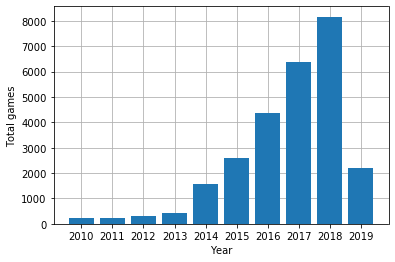

In [6]:
#df['release_month'] = pd.DatetimeIndex(df['release_date']).month
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

yearly = df.groupby(df.release_date.dt.year).agg('count').appid
min_year = 2010
max_year = 2020
#plt.figure(figsize=(8,8))
yearly_part = yearly[yearly.index >= min_year]
#plt.title(f'Number of games released in {min_year}-{max_year} years')
plt.xlabel('Year')
plt.ylabel('Total games')
plt.xticks(yearly.index)
#plt.yticks(yearly_part)
plt.bar(yearly_part.index, yearly_part)
plt.savefig('images/number-games-year.pdf', bbox_inches='tight')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x35124E30>,
      dtype=object)

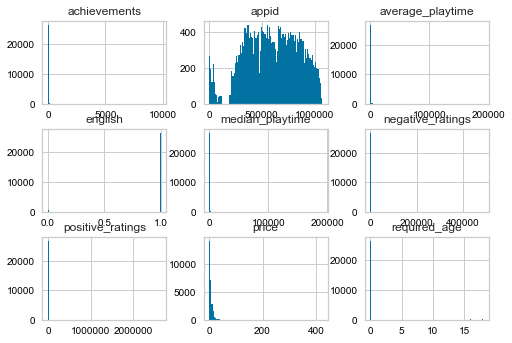

In [121]:
df.hist(bins = 100)

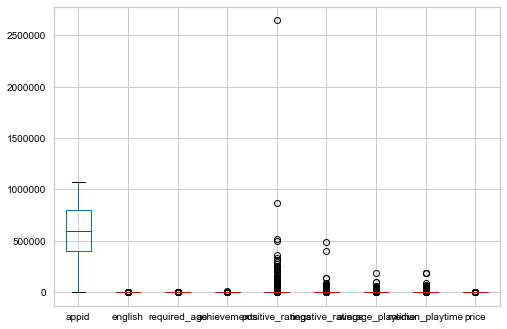

In [122]:
df.boxplot()

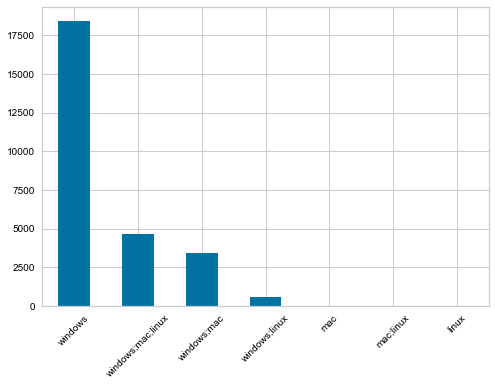

In [123]:
#plt.figure(figsize=(10,10))
df['platforms'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.savefig('images/platforms-7.pdf', bbox_inches='tight')

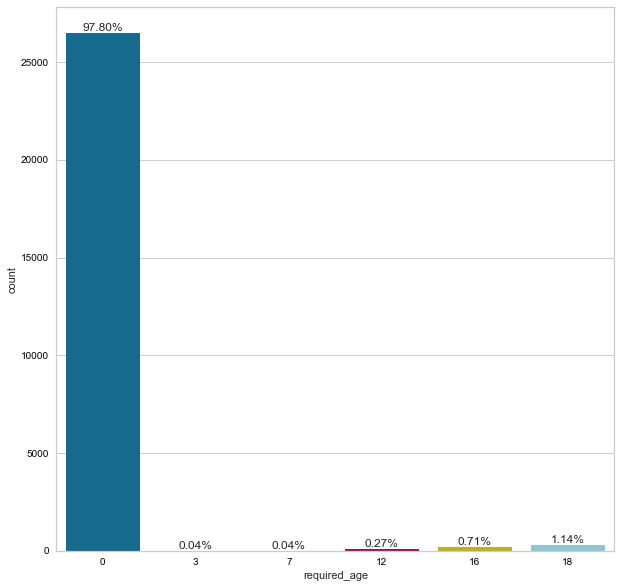

In [124]:
plt.figure(figsize=(10,10))
#df.groupby('required_age').size().plot(kind='bar')
#plt.title('required_age_count')
plt.xlabel('Number of count')
ax = sns.countplot(x=df['required_age'])
total = len(df['required_age'])
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), ha="center",va="bottom")

plt.savefig('images/required-age.pdf', bbox_inches='tight')

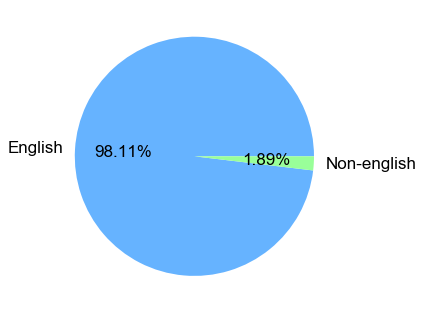

In [143]:
#plt.figure(figsize=(10,10))
colors = ['#66b3ff','#99ff99','#ffcc99','#ff9999']
#df['english'].value_counts().plot(kind='pie', autopct='%.2f')
plt.pie(df['english'].value_counts(), labels=['English', 'Non-english'],
        colors=colors, autopct='%1.2f%%', textprops=dict(color="black", size=17))
plt.savefig('images/english.pdf', bbox_inches='tight')

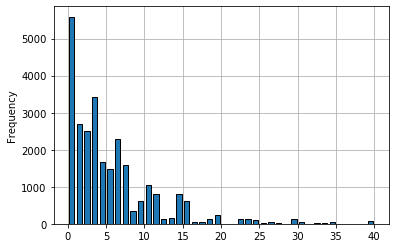

In [9]:
from statistics import median
df['price'].plot(kind='hist', bins=range(0,41), ec='black', rwidth = 0.7, range=None)
plt.savefig('images/price.pdf', bbox_inches='tight')

1028.6043010752687
24.0
26040


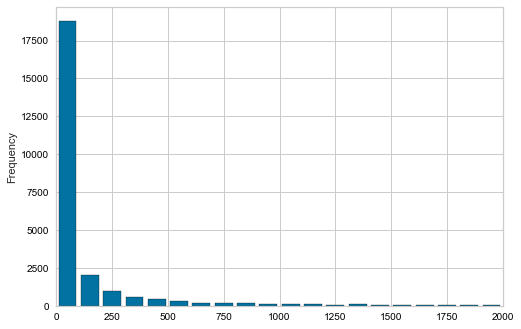

In [94]:
print(mean(df['positive_ratings']))
print(median(df['positive_ratings']))
#dff = df.loc[df['positive_ratings'] >= 0]
#dff2 = df[df['positive_ratings'] >= 0]
count = len(df['positive_ratings'])
print(count)
df['positive_ratings'].plot(kind='hist', bins=range(0,count, 100), ec='black', rwidth = 0.8, xlim=(0, 2000))
plt.savefig('images/positive-ratings.pdf', bbox_inches='tight')

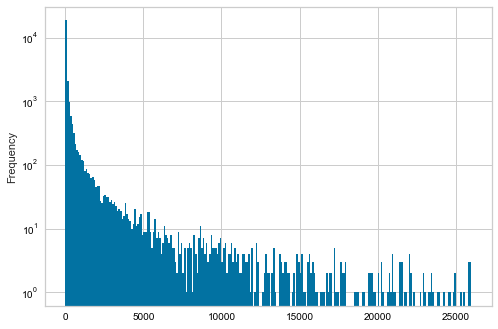

In [106]:
count = len(df['positive_ratings'])
df['positive_ratings'].plot(kind='hist', logy=True, bins=range(0,count, 100), rwidth = 1)
plt.savefig('images/positive-ratings-log.pdf', bbox_inches='tight')

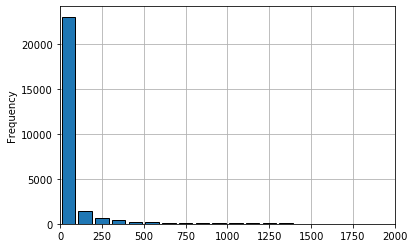

In [11]:
count = len(df['negative_ratings'])
df['negative_ratings'].plot(kind='hist', bins=range(0,count, 100), ec='black', rwidth = 0.8, xlim=(0, 2000))
plt.savefig('images/negative-ratings.pdf', bbox_inches='tight')

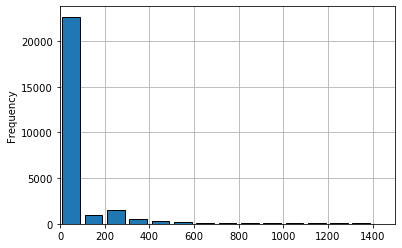

In [12]:
count = len(df['average_playtime'])
df['average_playtime'].plot(kind='hist', bins=range(0,count, 100), ec='black', rwidth = 0.8, xlim=(0, 1500))
plt.savefig('images/average-playtime.pdf', bbox_inches='tight')

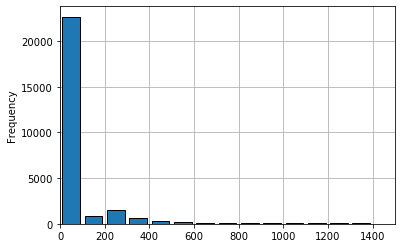

In [13]:
count = len(df['median_playtime'])
df['median_playtime'].plot(kind='hist', bins=range(0,count, 100), ec='black', rwidth = 0.8, xlim=(0, 1500))
plt.savefig('images/median-playtime.pdf', bbox_inches='tight')

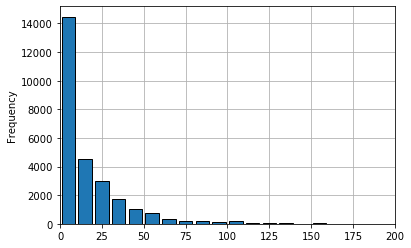

In [14]:
count = len(df['achievements'])
df['achievements'].plot(kind='hist', bins=range(0,count, 10), edgecolor='black', rwidth = 0.8, xlim=(0, 200))
plt.savefig('images/achievements.pdf', bbox_inches='tight')

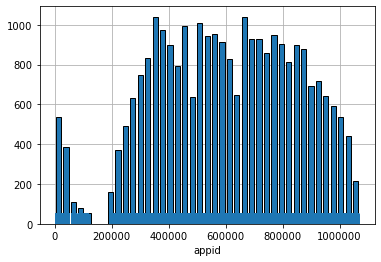

In [15]:
sns.distplot(df['appid'], kde=False, rug=True, hist_kws={"rwidth":0.7,'edgecolor':'black', 'alpha':1.0});
plt.savefig('images/appid.pdf', bbox_inches='tight')

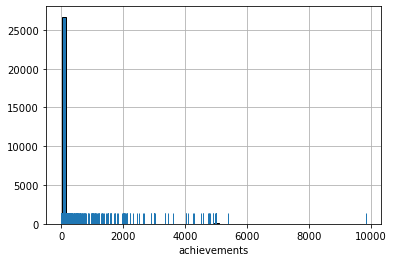

In [16]:
sns.distplot(df['achievements'], kde=False, rug=True, hist_kws={"rwidth":0.7,'edgecolor':'black', 'alpha':1.0});
plt.savefig('images/achievements-sns.pdf', bbox_inches='tight')

In [17]:
platforms = df['platforms'].str.get_dummies(';')
platforms

linux  mac  windows
0          1    1        1
1          1    1        1
2          1    1        1
3          1    1        1
4          1    1        1
...      ...  ...      ...
27070      0    0        1
27071      0    0        1
27072      0    0        1
27073      0    1        1
27074      0    1        1

[27075 rows x 3 columns]

In [18]:
df = pd.concat([df.drop('platforms', axis=1), platforms], axis=1)
df

appid                        name release_date  english  \
0           10              Counter-Strike   2000-11-01        1   
1           20       Team Fortress Classic   1999-04-01        1   
2           30               Day of Defeat   2003-05-01        1   
3           40          Deathmatch Classic   2001-06-01        1   
4           50   Half-Life: Opposing Force   1999-11-01        1   
...        ...                         ...          ...      ...   
27070  1065230             Room of Pandora   2019-04-24        1   
27071  1065570                   Cyber Gun   2019-04-23        1   
27072  1065650            Super Star Blast   2019-04-24        1   
27073  1066700  New Yankee 7: Deer Hunters   2019-04-17        1   
27074  1069460                   Rune Lord   2019-04-24        1   

                developer             publisher  required_age  \
0                   Valve                 Valve             0   
1                   Valve                 Valve             0   
2                   Valve                 Valve             0   
3                   Valve                 Valve             0   
4        Gearbox Software                 Valve             0   
...                   ...                   ...           ...   
27070         SHEN JIAWEI           SHEN JIAWEI             0   
27071      Semyon Maximov      BekkerDev Studio             0   
27072         EntwicklerX           EntwicklerX             0   
27073  Yustas Game Studio  Alawar Entertainment             0   
27074    Adept Studios GD  Alawar Entertainment             0   

                                              categories  \
0      Multi-player;Online Multi-Player;Local Multi-P...   
1      Multi-player;Online Multi-Player;Local Multi-P...   
2                  Multi-player;Valve Anti-Cheat enabled   
3      Multi-player;Online Multi-Player;Local Multi-P...   
4      Single-player;Multi-player;Valve Anti-Cheat en...   
...                                                  ...   
27070                   Single-player;Steam Achievements   
27071                                      Single-player   
27072  Single-player;Multi-player;Co-op;Shared/Split ...   
27073                          Single-player;Steam Cloud   
27074                          Single-player;Steam Cloud   

                       genres                 steamspy_tags  achievements  \
0                      Action        Action;FPS;Multiplayer             0   
1                      Action        Action;FPS;Multiplayer             0   
2                      Action  FPS;World War II;Multiplayer             0   
3                      Action        Action;FPS;Multiplayer             0   
4                      Action             FPS;Action;Sci-fi             0   
...                       ...                           ...           ...   
27070  Adventure;Casual;Indie        Adventure;Indie;Casual             7   
27071  Action;Adventure;Indie        Action;Indie;Adventure             0   
27072     Action;Casual;Indie           Action;Indie;Casual            24   
27073  Adventure;Casual;Indie        Indie;Casual;Adventure             0   
27074  Adventure;Casual;Indie        Indie;Casual;Adventure             0   

       positive_ratings  negative_ratings  average_playtime  median_playtime  \
0                124534              3339             17612              317   
1                  3318               633               277               62   
2                  3416               398               187               34   
3                  1273               267               258              184   
4                  5250               288               624              415   
...                 ...               ...               ...              ...   
27070                 3                 0                 0                0   
27071                 8                 1                 0                0   
27072                 0                 1    

In [19]:
genres = df['genres'].str.get_dummies(';')
genres

Accounting  Action  Adventure  Animation & Modeling  Audio Production  \
0               0       1          0                     0                 0   
1               0       1          0                     0                 0   
2               0       1          0                     0                 0   
3               0       1          0                     0                 0   
4               0       1          0                     0                 0   
...           ...     ...        ...                   ...               ...   
27070           0       0          1                     0                 0   
27071           0       1          1                     0                 0   
27072           0       1          0                     0                 0   
27073           0       0          1                     0                 0   
27074           0       0          1                     0                 0   

       Casual  Design & Illustration  Documentary  Early Access  Education  \
0           0                      0            0             0          0   
1           0                      0            0             0          0   
2           0                      0            0             0          0   
3           0                      0            0             0          0   
4           0                      0            0             0          0   
...       ...                    ...          ...           ...        ...   
27070       1                      0            0             0          0   
27071       0                      0            0             0          0   
27072       1                      0            0             0          0   
27073       1                      0            0             0          0   
27074       1                      0            0             0          0   

       ...  Sexual Content  Simulation  Software Training  Sports  Strategy  \
0      ...               0           0                  0       0         0   
1      ...               0           0                  0       0         0   
2      ...               0           0                  0       0         0   
3      ...               0           0                  0       0         0   
4      ...               0           0                  0       0         0   
...    ...             ...         ...                ...     ...       ...   
27070  ...               0           0                  0       0         0   
27071  ...               0           0                  0       0         0   
27072  ...               0           0                  0       0         0   
27073  ...               0           0                  0       0         0   
27074  ...               0           0                  0       0         0   

       Tutorial  Utilities  Video Production  Violent  Web Publishing  
0             0          0                 0        0               0  
1             0          0                 0        0               0  
2             0          0                 0        0               0  
3             0          0                 0        0               0  
4             0          0                 0        0               0  
...         ...        ...               ...      ...             ...  
27070         0          0                 0        0               0  
27071         0          0                 0        0               0  
27072         0          0                 0        0               0  
27073         0          0                 0        0               0  
27074         0          0                 0        0               0  

[27075 rows x 29 columns]

In [20]:
genres.mean().sort_values(ascending=False)

Indie                    0.717304
Action                   0.439631
Casual                   0.377101
Adventure                0.370526
Strategy                 0.193795
Simulation               0.191837
RPG                      0.159224
Early Access             0.109104
Free to Play             0.062936
Sports                   0.048827
Racing                   0.037821
Violent                  0.031136
Massively Multiplayer    0.026704
Gore                     0.019834
Nudity                   0.009825
Sexual Content           0.009049
Utilities                0.005392
Design & Illustration    0.003213
Animation & Modeling     0.002918
Education                0.001884
Video Production         0.001404
Software Training        0.001145
Audio Production         0.001071
Web Publishing           0.001034
Game Development         0.000628
Photo Editing            0.000443
Accounting               0.000222
Documentary              0.000037
Tutorial                 0.000037
dtype: float64

In [21]:
col_names = genres.mean()[genres.mean() > 0.01].sort_values(ascending=False).keys()
list(col_names)

['Indie',
 'Action',
 'Casual',
 'Adventure',
 'Strategy',
 'Simulation',
 'RPG',
 'Early Access',
 'Free to Play',
 'Sports',
 'Racing',
 'Violent',
 'Massively Multiplayer',
 'Gore']

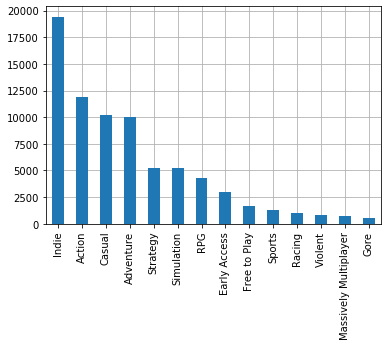

In [22]:
genres[col_names].sum().sort_values(ascending=False).plot(kind='bar')
plt.savefig('images/genres.pdf', bbox_inches='tight')

In [23]:
df = pd.concat([df.drop('genres', axis=1), genres[col_names]], axis=1)
df

appid                        name release_date  english  \
0           10              Counter-Strike   2000-11-01        1   
1           20       Team Fortress Classic   1999-04-01        1   
2           30               Day of Defeat   2003-05-01        1   
3           40          Deathmatch Classic   2001-06-01        1   
4           50   Half-Life: Opposing Force   1999-11-01        1   
...        ...                         ...          ...      ...   
27070  1065230             Room of Pandora   2019-04-24        1   
27071  1065570                   Cyber Gun   2019-04-23        1   
27072  1065650            Super Star Blast   2019-04-24        1   
27073  1066700  New Yankee 7: Deer Hunters   2019-04-17        1   
27074  1069460                   Rune Lord   2019-04-24        1   

                developer             publisher  required_age  \
0                   Valve                 Valve             0   
1                   Valve                 Valve             0   
2                   Valve                 Valve             0   
3                   Valve                 Valve             0   
4        Gearbox Software                 Valve             0   
...                   ...                   ...           ...   
27070         SHEN JIAWEI           SHEN JIAWEI             0   
27071      Semyon Maximov      BekkerDev Studio             0   
27072         EntwicklerX           EntwicklerX             0   
27073  Yustas Game Studio  Alawar Entertainment             0   
27074    Adept Studios GD  Alawar Entertainment             0   

                                              categories  \
0      Multi-player;Online Multi-Player;Local Multi-P...   
1      Multi-player;Online Multi-Player;Local Multi-P...   
2                  Multi-player;Valve Anti-Cheat enabled   
3      Multi-player;Online Multi-Player;Local Multi-P...   
4      Single-player;Multi-player;Valve Anti-Cheat en...   
...                                                  ...   
27070                   Single-player;Steam Achievements   
27071                                      Single-player   
27072  Single-player;Multi-player;Co-op;Shared/Split ...   
27073                          Single-player;Steam Cloud   
27074                          Single-player;Steam Cloud   

                      steamspy_tags  achievements  ...  Strategy  Simulation  \
0            Action;FPS;Multiplayer             0  ...         0           0   
1            Action;FPS;Multiplayer             0  ...         0           0   
2      FPS;World War II;Multiplayer             0  ...         0           0   
3            Action;FPS;Multiplayer             0  ...         0           0   
4                 FPS;Action;Sci-fi             0  ...         0           0   
...                             ...           ...  ...       ...         ...   
27070        Adventure;Indie;Casual             7  ...         0           0   
27071        Action;Indie;Adventure             0  ...         0           0   
27072           Action;Indie;Casual            24  ...         0           0   
27073        Indie;Casual;Adventure             0  ...         0           0   
27074        Indie;Casual;Adventure             0  ...         0           0   

       RPG  Early Access Free to Play  Sports  Racing  Violent  \
0        0             0            0       0       0        0   
1        0             0            0       0       0        0   
2        0             0            0       0       0        0   
3        0             0            0       0       0        0   
4        0             0            0       0       0        0   
...    ...           ...          ...     ...     ...      ...   
27070    0             0            0       0       0        0   
27071    0             0            0       0       0        0   
27072    0             0            0       0       0        0   
27073    0             0            0       0       0        0   
270

In [24]:
df.loc[:, (df != 0).any(axis=0)]

appid                        name release_date  english  \
0           10              Counter-Strike   2000-11-01        1   
1           20       Team Fortress Classic   1999-04-01        1   
2           30               Day of Defeat   2003-05-01        1   
3           40          Deathmatch Classic   2001-06-01        1   
4           50   Half-Life: Opposing Force   1999-11-01        1   
...        ...                         ...          ...      ...   
27070  1065230             Room of Pandora   2019-04-24        1   
27071  1065570                   Cyber Gun   2019-04-23        1   
27072  1065650            Super Star Blast   2019-04-24        1   
27073  1066700  New Yankee 7: Deer Hunters   2019-04-17        1   
27074  1069460                   Rune Lord   2019-04-24        1   

                developer             publisher  required_age  \
0                   Valve                 Valve             0   
1                   Valve                 Valve             0   
2                   Valve                 Valve             0   
3                   Valve                 Valve             0   
4        Gearbox Software                 Valve             0   
...                   ...                   ...           ...   
27070         SHEN JIAWEI           SHEN JIAWEI             0   
27071      Semyon Maximov      BekkerDev Studio             0   
27072         EntwicklerX           EntwicklerX             0   
27073  Yustas Game Studio  Alawar Entertainment             0   
27074    Adept Studios GD  Alawar Entertainment             0   

                                              categories  \
0      Multi-player;Online Multi-Player;Local Multi-P...   
1      Multi-player;Online Multi-Player;Local Multi-P...   
2                  Multi-player;Valve Anti-Cheat enabled   
3      Multi-player;Online Multi-Player;Local Multi-P...   
4      Single-player;Multi-player;Valve Anti-Cheat en...   
...                                                  ...   
27070                   Single-player;Steam Achievements   
27071                                      Single-player   
27072  Single-player;Multi-player;Co-op;Shared/Split ...   
27073                          Single-player;Steam Cloud   
27074                          Single-player;Steam Cloud   

                      steamspy_tags  achievements  ...  Strategy  Simulation  \
0            Action;FPS;Multiplayer             0  ...         0           0   
1            Action;FPS;Multiplayer             0  ...         0           0   
2      FPS;World War II;Multiplayer             0  ...         0           0   
3            Action;FPS;Multiplayer             0  ...         0           0   
4                 FPS;Action;Sci-fi             0  ...         0           0   
...                             ...           ...  ...       ...         ...   
27070        Adventure;Indie;Casual             7  ...         0           0   
27071        Action;Indie;Adventure             0  ...         0           0   
27072           Action;Indie;Casual            24  ...         0           0   
27073        Indie;Casual;Adventure             0  ...         0           0   
27074        Indie;Casual;Adventure             0  ...         0           0   

       RPG  Early Access Free to Play  Sports  Racing  Violent  \
0        0             0            0       0       0        0   
1        0             0            0       0       0        0   
2        0             0            0       0       0        0   
3        0             0            0       0       0        0   
4        0             0            0       0       0        0   
...    ...           ...          ...     ...     ...      ...   
27070    0             0            0       0       0        0   
27071    0             0            0       0       0        0   
27072    0             0            0       0       0        0   
27073    0             0            0       0       0        0   
270

In [25]:
df = df[df[col_names].sum(axis=1) > 0]

In [26]:
df = df.drop(['categories', 'steamspy_tags'], axis=1)

In [27]:
df = df[df['english'] == 1].copy()
df

appid                        name release_date  english  \
0           10              Counter-Strike   2000-11-01        1   
1           20       Team Fortress Classic   1999-04-01        1   
2           30               Day of Defeat   2003-05-01        1   
3           40          Deathmatch Classic   2001-06-01        1   
4           50   Half-Life: Opposing Force   1999-11-01        1   
...        ...                         ...          ...      ...   
27070  1065230             Room of Pandora   2019-04-24        1   
27071  1065570                   Cyber Gun   2019-04-23        1   
27072  1065650            Super Star Blast   2019-04-24        1   
27073  1066700  New Yankee 7: Deer Hunters   2019-04-17        1   
27074  1069460                   Rune Lord   2019-04-24        1   

                developer             publisher  required_age  achievements  \
0                   Valve                 Valve             0             0   
1                   Valve                 Valve             0             0   
2                   Valve                 Valve             0             0   
3                   Valve                 Valve             0             0   
4        Gearbox Software                 Valve             0             0   
...                   ...                   ...           ...           ...   
27070         SHEN JIAWEI           SHEN JIAWEI             0             7   
27071      Semyon Maximov      BekkerDev Studio             0             0   
27072         EntwicklerX           EntwicklerX             0            24   
27073  Yustas Game Studio  Alawar Entertainment             0             0   
27074    Adept Studios GD  Alawar Entertainment             0             0   

       positive_ratings  negative_ratings  ...  Strategy  Simulation RPG  \
0                124534              3339  ...         0           0   0   
1                  3318               633  ...         0           0   0   
2                  3416               398  ...         0           0   0   
3                  1273               267  ...         0           0   0   
4                  5250               288  ...         0           0   0   
...                 ...               ...  ...       ...         ...  ..   
27070                 3                 0  ...         0           0   0   
27071                 8                 1  ...         0           0   0   
27072                 0                 1  ...         0           0   0   
27073                 2                 0  ...         0           0   0   
27074                 4                 0  ...         0           0   0   

       Early Access  Free to Play  Sports  Racing  Violent  \
0                 0             0       0       0        0   
1                 0             0       0       0        0   
2                 0             0       0       0        0   
3                 0             0       0       0        0   
4                 0             0       0       0        0   
...             ...           ...     ...     ...      ...   
27070             0             0       0       0        0   
27071             0             0       0       0        0   
27072             0             0       0       0        0   
27073             0             0       0       0        0   
27074             0             0       0       0        0   

       Massively Multiplayer  Gore  
0                          0     0  
1                          0     0  
2                          0     0  
3                          0     0  
4                          0     0  
...                      ...   ...  
27070                      0     0  
27071                      0     0  
27072                      0     0  
27073                      0     0  
27074                      0     0  

[26408 rows x 31 columns]

In [28]:
df[['appid', 'required_age', 'achievements', 'price']].head()
df.select_dtypes(include='number')

appid  english  required_age  achievements  positive_ratings  \
0           10        1             0             0            124534   
1           20        1             0             0              3318   
2           30        1             0             0              3416   
3           40        1             0             0              1273   
4           50        1             0             0              5250   
...        ...      ...           ...           ...               ...   
27070  1065230        1             0             7                 3   
27071  1065570        1             0             0                 8   
27072  1065650        1             0            24                 0   
27073  1066700        1             0             0                 2   
27074  1069460        1             0             0                 4   

       negative_ratings  average_playtime  median_playtime  price  linux  ...  \
0                  3339             17612              317   7.19      1  ...   
1                   633               277               62   3.99      1  ...   
2                   398               187               34   3.99      1  ...   
3                   267               258              184   3.99      1  ...   
4                   288               624              415   3.99      1  ...   
...                 ...               ...              ...    ...    ...  ...   
27070                 0                 0                0   2.09      0  ...   
27071                 1                 0                0   1.69      0  ...   
27072                 1                 0                0   3.99      0  ...   
27073                 0                 0                0   5.19      0  ...   
27074                 0                 0                0   5.19      0  ...   

       Strategy  Simulation  RPG  Early Access  Free to Play  Sports  Racing  \
0             0           0    0             0             0       0       0   
1             0           0    0             0             0       0       0   
2             0           0    0             0             0       0       0   
3             0           0    0             0             0       0       0   
4             0           0    0             0             0       0       0   
...         ...         ...  ...           ...           ...     ...     ...   
27070         0           0    0             0             0       0       0   
27071         0           0    0             0             0       0       0   
27072         0           0    0             0             0       0       0   
27073         0           0    0             0             0       0       0   
27074         0           0    0             0             0       0       0   

       Violent  Massively Multiplayer  Gore  
0            0                      0     0  
1            0                      0     0  
2            0                      0     0  
3            0                      0     0  
4            0                      0     0  
...        ...                    ...   ...  
27070        0                      0     0  
27071        0                      0     0  
27072        0                      0     0  
27073        0                      0     0  
27074        0                      0     0  

[26408 rows x 26 columns]

Text(0.5, 1.0, 'Top 2 Principal Components')

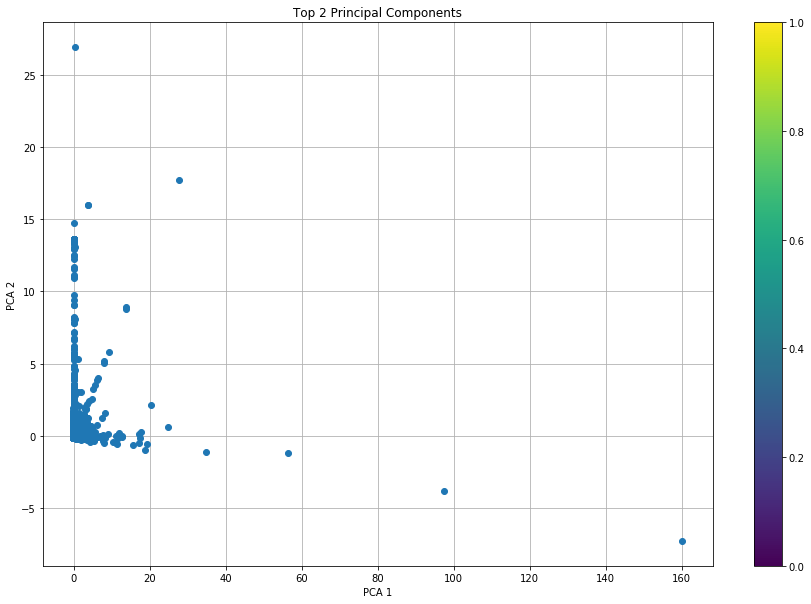

In [29]:
# Select only the first 2 principal components
pca = PCA(2)  # project from 64 to 2 dimensions
#Compute the first 2 PCA

x = StandardScaler().fit_transform(df.select_dtypes(include='number'))
x = pd.DataFrame(x, columns=df.select_dtypes(include='number').columns)

projected = pca.fit_transform(x[['positive_ratings', 'negative_ratings', 'average_playtime', 'achievements']], 'price')

# Plot a scatter plot of the first 2 principal components
plt.figure(figsize=(15, 10))
plt.scatter(projected[:, 0], projected[:, 1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar();
plt.title("Top 2 Principal Components")
#plt.savefig('images/fig1.png', bbox_inches='tight')

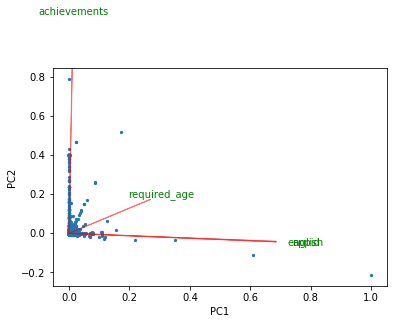

In [30]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(projected[:,0:2],np.transpose(pca.components_[0:2, :]),list(x.columns))
plt.show()


In [31]:
from yellowbrick.features.pca import PCADecomposition

c:\users\sekian\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


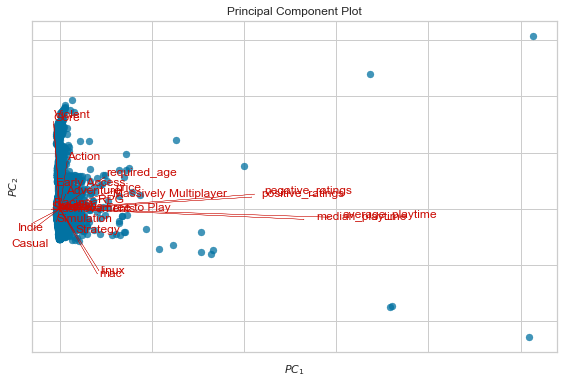

In [32]:
X = df.select_dtypes(include='number')
X = X.drop('appid', axis=1)
visualizer = PCADecomposition(scale=True, proj_features=True, )
visualizer.fit_transform(X)
visualizer.show()

In [33]:
#DO IT IN R WITH RCOMMANDER?

In [34]:
df = df[~df['name'].str.contains('[^\u0001-\u007F]{3,}')]

In [35]:
df.loc[:,'owners'] = df.loc[:,'owners'].str.split('-', expand=True).iloc[:,0]

c:\users\sekian\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [36]:
df

appid                        name release_date  english  \
0           10              Counter-Strike   2000-11-01        1   
1           20       Team Fortress Classic   1999-04-01        1   
2           30               Day of Defeat   2003-05-01        1   
3           40          Deathmatch Classic   2001-06-01        1   
4           50   Half-Life: Opposing Force   1999-11-01        1   
...        ...                         ...          ...      ...   
27070  1065230             Room of Pandora   2019-04-24        1   
27071  1065570                   Cyber Gun   2019-04-23        1   
27072  1065650            Super Star Blast   2019-04-24        1   
27073  1066700  New Yankee 7: Deer Hunters   2019-04-17        1   
27074  1069460                   Rune Lord   2019-04-24        1   

                developer             publisher  required_age  achievements  \
0                   Valve                 Valve             0             0   
1                   Valve                 Valve             0             0   
2                   Valve                 Valve             0             0   
3                   Valve                 Valve             0             0   
4        Gearbox Software                 Valve             0             0   
...                   ...                   ...           ...           ...   
27070         SHEN JIAWEI           SHEN JIAWEI             0             7   
27071      Semyon Maximov      BekkerDev Studio             0             0   
27072         EntwicklerX           EntwicklerX             0            24   
27073  Yustas Game Studio  Alawar Entertainment             0             0   
27074    Adept Studios GD  Alawar Entertainment             0             0   

       positive_ratings  negative_ratings  ...  Strategy  Simulation RPG  \
0                124534              3339  ...         0           0   0   
1                  3318               633  ...         0           0   0   
2                  3416               398  ...         0           0   0   
3                  1273               267  ...         0           0   0   
4                  5250               288  ...         0           0   0   
...                 ...               ...  ...       ...         ...  ..   
27070                 3                 0  ...         0           0   0   
27071                 8                 1  ...         0           0   0   
27072                 0                 1  ...         0           0   0   
27073                 2                 0  ...         0           0   0   
27074                 4                 0  ...         0           0   0   

       Early Access  Free to Play  Sports  Racing  Violent  \
0                 0             0       0       0        0   
1                 0             0       0       0        0   
2                 0             0       0       0        0   
3                 0             0       0       0        0   
4                 0             0       0       0        0   
...             ...           ...     ...     ...      ...   
27070             0             0       0       0        0   
27071             0             0       0       0        0   
27072             0             0       0       0        0   
27073             0             0       0       0        0   
27074             0             0       0       0        0   

       Massively Multiplayer  Gore  
0                          0     0  
1                          0     0  
2                          0     0  
3                          0     0  
4                          0     0  
...                      ...   ...  
27070                      0     0  
27071                      0     0  
27072                      0     0  
27073                      0     0  
27074                      0     0  

[26040 rows x 31 columns]

In [37]:
df.describe(include='all')

appid         name         release_date  english  \
count   2.604000e+04        26040                26040  26040.0   
unique           NaN        25999                 2614      NaN   
top              NaN  Dark Matter  2018-07-13 00:00:00      NaN   
freq             NaN            3                   62      NaN   
first            NaN          NaN  1997-06-30 00:00:00      NaN   
last             NaN          NaN  2019-05-01 00:00:00      NaN   
mean    5.898373e+05          NaN                  NaN      1.0   
std     2.501766e+05          NaN                  NaN      0.0   
min     1.000000e+01          NaN                  NaN      1.0   
25%     3.963425e+05          NaN                  NaN      1.0   
50%     5.897500e+05          NaN                  NaN      1.0   
75%     7.914750e+05          NaN                  NaN      1.0   
max     1.069460e+06          NaN                  NaN      1.0   

              developer       publisher  required_age  achievements  \
count             26040           26040  26040.000000  26040.000000   
unique            16434           13765           NaN           NaN   
top     Choice of Games  Big Fish Games           NaN           NaN   
freq                 94             212           NaN           NaN   
first               NaN             NaN           NaN           NaN   
last                NaN             NaN           NaN           NaN   
mean                NaN             NaN      0.359601     46.583103   
std                 NaN             NaN      2.420983    359.514660   
min                 NaN             NaN      0.000000      0.000000   
25%                 NaN             NaN      0.000000      0.000000   
50%                 NaN             NaN      0.000000      8.000000   
75%                 NaN             NaN      0.000000     23.000000   
max                 NaN             NaN     18.000000   9821.000000   

        positive_ratings  negative_ratings  ...      Strategy    Simulation  \
count       2.604000e+04      26040.000000  ...  26040.000000  26040.000000   
unique               NaN               NaN  ...           NaN           NaN   
top                  NaN               NaN  ...           NaN           NaN   
freq                 NaN               NaN  ...           NaN           NaN   
first                NaN               NaN  ...           NaN           NaN   
last                 NaN               NaN  ...           NaN           NaN   
mean        1.028604e+03        217.133871  ...      0.192435      0.192012   
std         1.935690e+04       4368.892380  ...      0.394220      0.393890   
min         0.000000e+00          0.000000  ...      0.000000      0.000000   
25%         6.000000e+00          2.000000  ...      0.000000      0.000000   
50%         2.400000e+01          9.000000  ...      0.000000      0.000000   
75%         1.260000e+02         42.000000  ...      0.000000      0.000000   
max         2.644404e+06     487076.000000  ...      1.000000      1.000000   

                 RPG  Early Access  Free to Play        Sports        Racing  \
count   26040.000000  26040.000000  26040.000000  26040.000000  26040.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean        0.151459      0.109063      0.062212      0.050000      0.038748   
std         0.358503      0.311724      0.241545      0.217949      0.192998   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.000000      0.000000      0.000000      0.000000      0.000000   
50%         0.000000      0.000000      0.000000      0.000000      0.000000   
75%         0.

In [38]:
df.isnull().any().sum()

0

In [39]:
df.drop('english', axis=1)

appid                        name release_date           developer  \
0           10              Counter-Strike   2000-11-01               Valve   
1           20       Team Fortress Classic   1999-04-01               Valve   
2           30               Day of Defeat   2003-05-01               Valve   
3           40          Deathmatch Classic   2001-06-01               Valve   
4           50   Half-Life: Opposing Force   1999-11-01    Gearbox Software   
...        ...                         ...          ...                 ...   
27070  1065230             Room of Pandora   2019-04-24         SHEN JIAWEI   
27071  1065570                   Cyber Gun   2019-04-23      Semyon Maximov   
27072  1065650            Super Star Blast   2019-04-24         EntwicklerX   
27073  1066700  New Yankee 7: Deer Hunters   2019-04-17  Yustas Game Studio   
27074  1069460                   Rune Lord   2019-04-24    Adept Studios GD   

                  publisher  required_age  achievements  positive_ratings  \
0                     Valve             0             0            124534   
1                     Valve             0             0              3318   
2                     Valve             0             0              3416   
3                     Valve             0             0              1273   
4                     Valve             0             0              5250   
...                     ...           ...           ...               ...   
27070           SHEN JIAWEI             0             7                 3   
27071      BekkerDev Studio             0             0                 8   
27072           EntwicklerX             0            24                 0   
27073  Alawar Entertainment             0             0                 2   
27074  Alawar Entertainment             0             0                 4   

       negative_ratings  average_playtime  ...  Strategy Simulation  RPG  \
0                  3339             17612  ...         0          0    0   
1                   633               277  ...         0          0    0   
2                   398               187  ...         0          0    0   
3                   267               258  ...         0          0    0   
4                   288               624  ...         0          0    0   
...                 ...               ...  ...       ...        ...  ...   
27070                 0                 0  ...         0          0    0   
27071                 1                 0  ...         0          0    0   
27072                 1                 0  ...         0          0    0   
27073                 0                 0  ...         0          0    0   
27074                 0                 0  ...         0          0    0   

       Early Access  Free to Play  Sports  Racing  Violent  \
0                 0             0       0       0        0   
1                 0             0       0       0        0   
2                 0             0       0       0        0   
3                 0             0       0       0        0   
4                 0             0       0       0        0   
...             ...           ...     ...     ...      ...   
27070             0             0       0       0        0   
27071             0             0       0       0        0   
27072             0             0       0       0        0   
27073             0             0       0       0        0   
27074             0             0       0       0        0   

       Massively Multiplayer  Gore  
0                          0     0  
1                          0     0  
2                          0     0  
3                          0     0  
4                          0     0  
...                      ...   ...  
27070                      0     0  
27071                      0     0  
27072                      0     0  
27073                      0     0  
27074                      0     0  

[26040 rows x 30 columns]

In [40]:
df[df.positive_ratings > 0]

appid                        name release_date  english  \
0           10              Counter-Strike   2000-11-01        1   
1           20       Team Fortress Classic   1999-04-01        1   
2           30               Day of Defeat   2003-05-01        1   
3           40          Deathmatch Classic   2001-06-01        1   
4           50   Half-Life: Opposing Force   1999-11-01        1   
...        ...                         ...          ...      ...   
27069  1065160                   Deatherem   2019-04-23        1   
27070  1065230             Room of Pandora   2019-04-24        1   
27071  1065570                   Cyber Gun   2019-04-23        1   
27073  1066700  New Yankee 7: Deer Hunters   2019-04-17        1   
27074  1069460                   Rune Lord   2019-04-24        1   

                developer             publisher  required_age  achievements  \
0                   Valve                 Valve             0             0   
1                   Valve                 Valve             0             0   
2                   Valve                 Valve             0             0   
3                   Valve                 Valve             0             0   
4        Gearbox Software                 Valve             0             0   
...                   ...                   ...           ...           ...   
27069               Anima          Team Syukino             0             1   
27070         SHEN JIAWEI           SHEN JIAWEI             0             7   
27071      Semyon Maximov      BekkerDev Studio             0             0   
27073  Yustas Game Studio  Alawar Entertainment             0             0   
27074    Adept Studios GD  Alawar Entertainment             0             0   

       positive_ratings  negative_ratings  ...  Strategy  Simulation RPG  \
0                124534              3339  ...         0           0   0   
1                  3318               633  ...         0           0   0   
2                  3416               398  ...         0           0   0   
3                  1273               267  ...         0           0   0   
4                  5250               288  ...         0           0   0   
...                 ...               ...  ...       ...         ...  ..   
27069                 2                 2  ...         0           0   0   
27070                 3                 0  ...         0           0   0   
27071                 8                 1  ...         0           0   0   
27073                 2                 0  ...         0           0   0   
27074                 4                 0  ...         0           0   0   

       Early Access  Free to Play  Sports  Racing  Violent  \
0                 0             0       0       0        0   
1                 0             0       0       0        0   
2                 0             0       0       0        0   
3                 0             0       0       0        0   
4                 0             0       0       0        0   
...             ...           ...     ...     ...      ...   
27069             0             0       0       0        0   
27070             0             0       0       0        0   
27071             0             0       0       0        0   
27073             0             0       0       0        0   
27074             0             0       0       0        0   

       Massively Multiplayer  Gore  
0                          0     0  
1                          0     0  
2                          0     0  
3                          0     0  
4                          0     0  
...                      ...   ...  
27069                      0     0  
27070                      0     0  
27071                      0     0  
27073                      0     0  
27074                      0     0  

[25401 rows x 31 columns]

c:\users\sekian\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


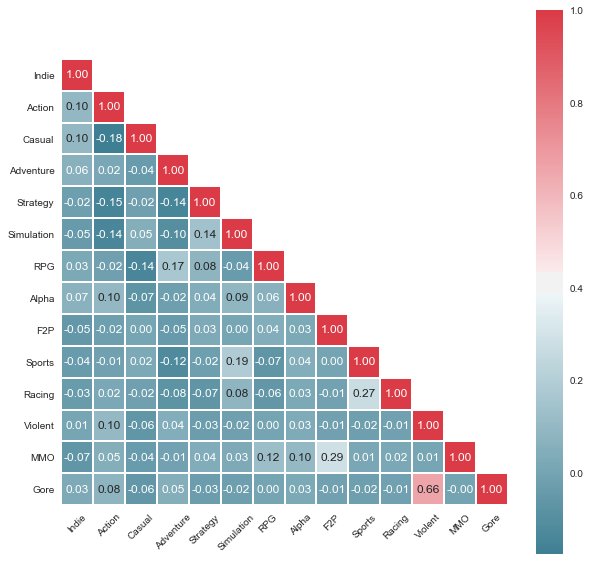

In [41]:
plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal', adjustable='box')
corr = df.select_dtypes(include='number').corr()
df.rename(columns={'Massively Multiplayer':'MMO', 'Free to Play':'F2P','Early Access':'Alpha'}, inplace=True)
col_genres = ['Indie', 'Action', 'Casual', 'Adventure',
       'Strategy', 'Simulation', 'RPG', 'Alpha', 'F2P',
       'Sports', 'Racing', 'Violent', 'MMO', 'Gore']
corr = df[col_genres].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask, 1)] = True

ax = sns.heatmap(corr, annot=True, mask=mask, linewidth=1, fmt= ".2f", cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.xticks(rotation=45)
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

plt.savefig('images/genres-heatmap.pdf', bbox_inches='tight')

In [42]:
df.columns
print(df.select_dtypes(include='number').columns)
columns = ['appid', 'english', 'required_age', 'achievements', 'positive_ratings',
 'negative_ratings', 'average_playtime', 'median_playtime', 'price']

Index(['appid', 'english', 'required_age', 'achievements', 'positive_ratings',
       'negative_ratings', 'average_playtime', 'median_playtime', 'price',
       'linux', 'mac', 'windows', 'Indie', 'Action', 'Casual', 'Adventure',
       'Strategy', 'Simulation', 'RPG', 'Alpha', 'F2P', 'Sports', 'Racing',
       'Violent', 'MMO', 'Gore'],
      dtype='object')


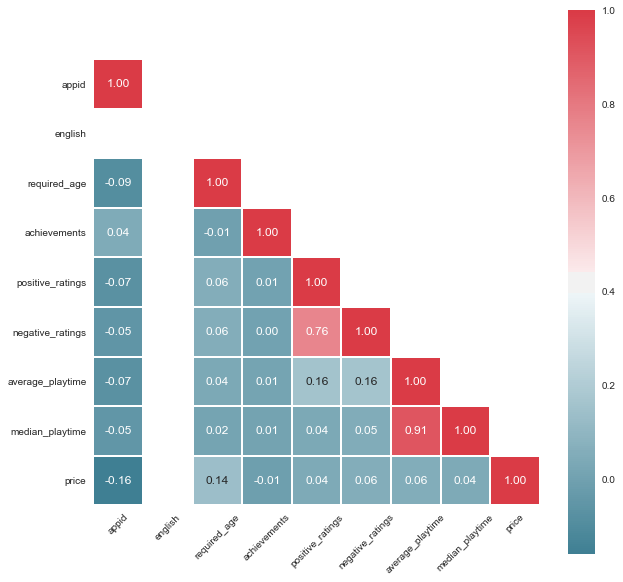

In [43]:
plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal', adjustable='box')
corr = df.select_dtypes(include='number').corr()
corr = df[columns].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask, 1)] = True
sns.heatmap(corr, annot=True, mask=mask, linewidth=1, fmt= ".2f", cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.xticks(rotation=45)
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

plt.savefig('images/corr-heatmap.pdf', bbox_inches='tight')

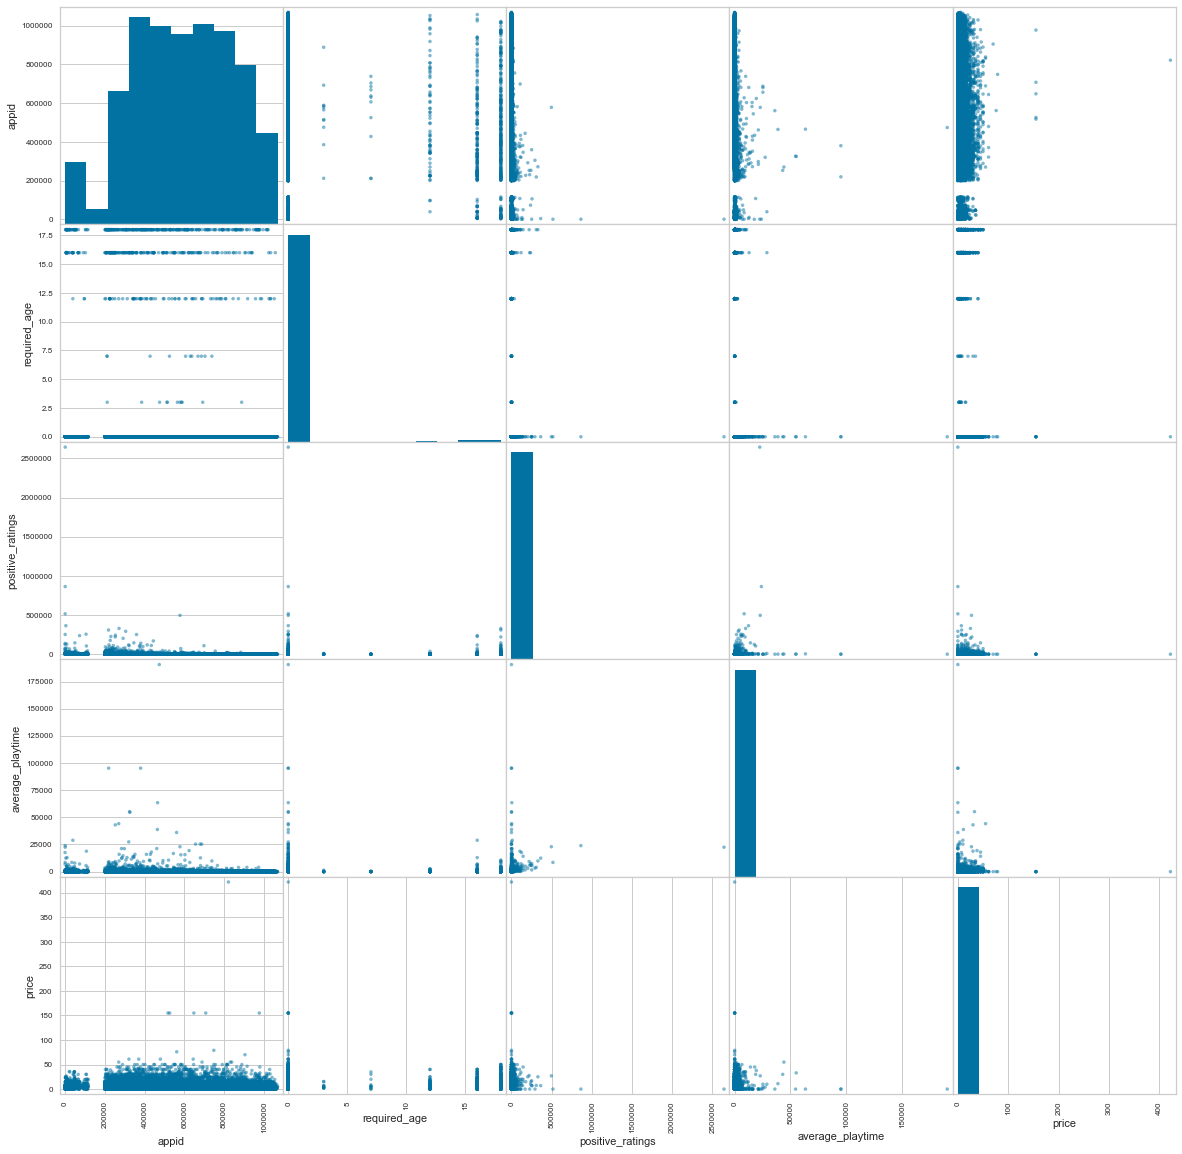

In [44]:
columns = ['appid', 'required_age', 'positive_ratings', 'average_playtime', 'price']
scatterPlots = pd.plotting.scatter_matrix(df[columns], figsize=(20,20))
#plt.savefig('images/scatter-plots.pdf', bbox_inches='tight')

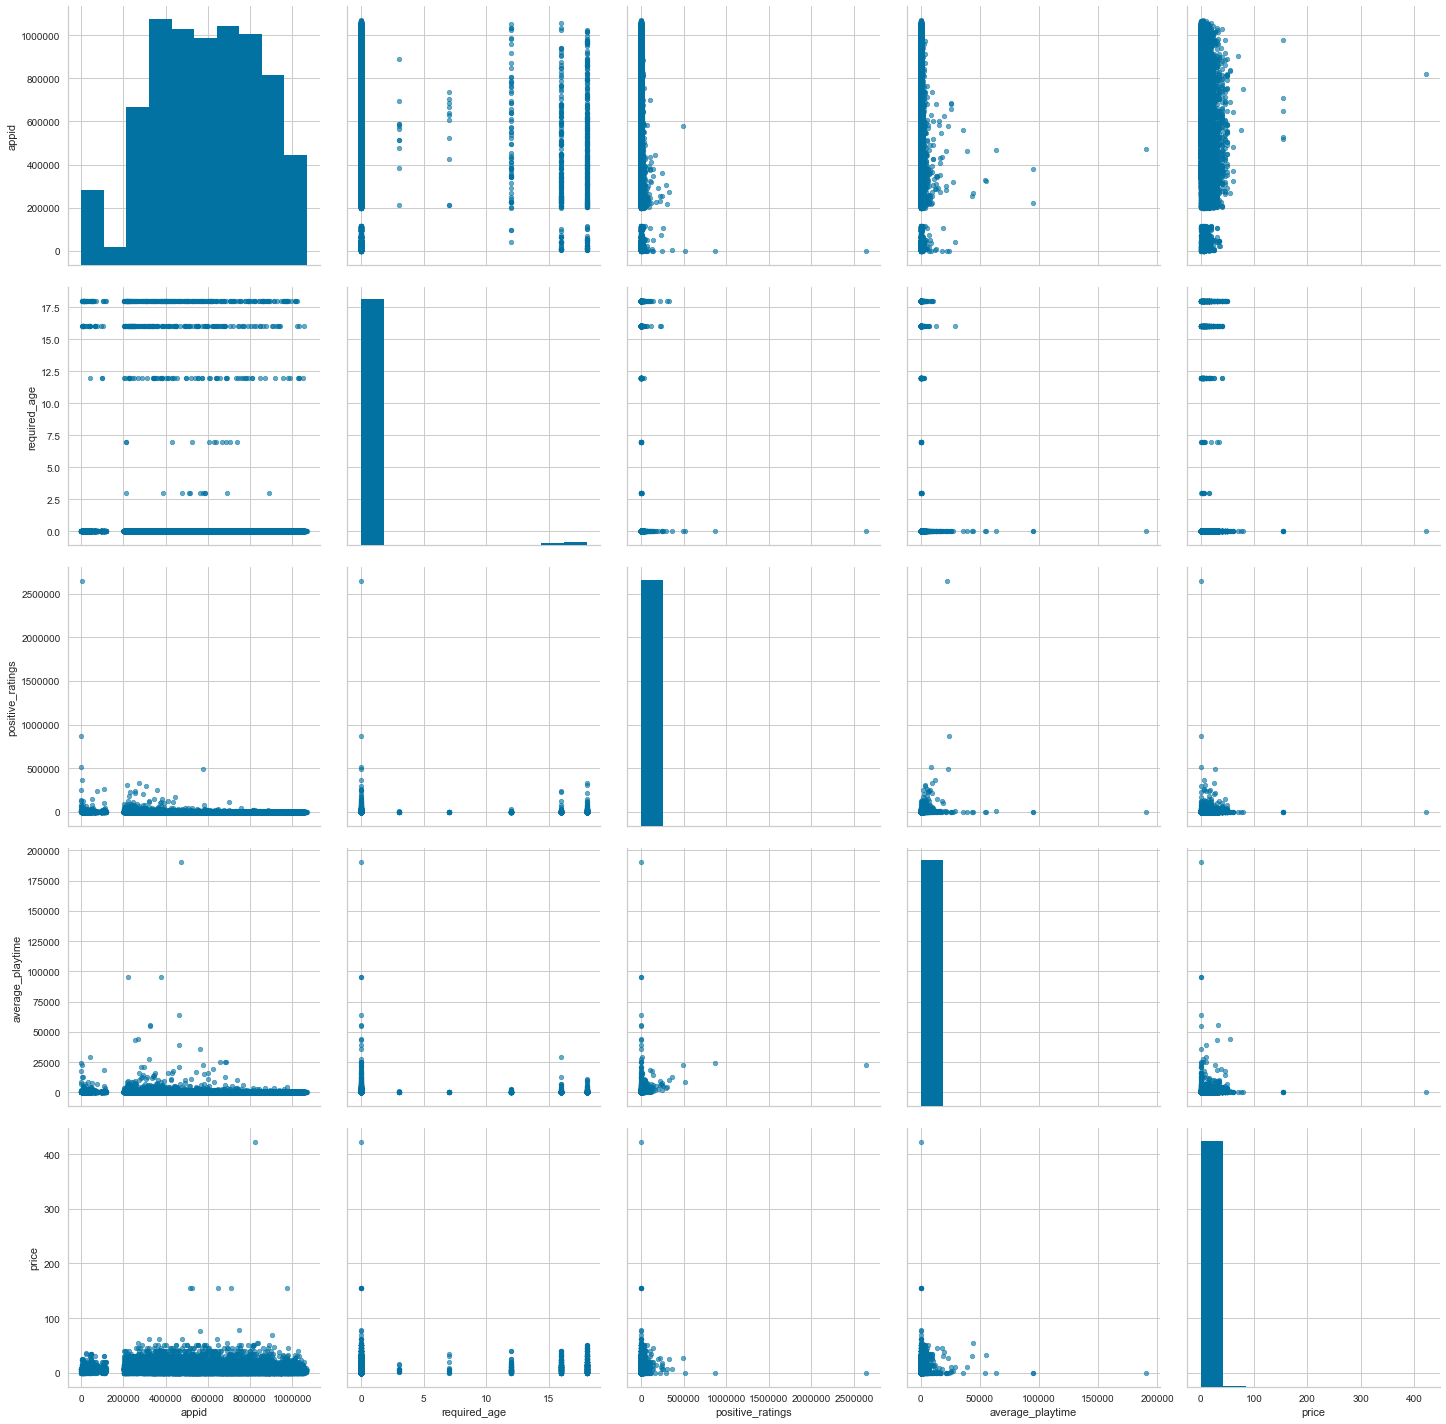

In [45]:
sns.pairplot(df[columns], plot_kws = {'alpha': 0.6, 's': 20, 'edgecolor': 'b'}, height = 4)
#plt.savefig('images/pair-plots.pdf', bbox_inches='tight')

In [46]:
#df.groupby('platforms').describe()
df.groupby(['windows', 'linux', 'mac']).describe()

appid                                                    \
                     count           mean            std       min       25%   
windows linux mac                                                              
0       0     1        3.0  492620.000000  248743.259808  214630.0  391840.0   
        1     0        1.0  805260.000000            NaN  805260.0  805260.0   
              1        1.0  594550.000000            NaN  594550.0  594550.0   
1       0     0    17493.0  613950.404848  252317.428098     630.0  436520.0   
              1     3362.0  572981.580607  249535.716636     500.0  373472.5   
        1     0      605.0  594440.661157  223052.057693    4920.0  404700.0   
              1     4575.0  509431.597377  227087.780901      10.0  338005.0   

                                                  english       ...  MMO       \
                        50%       75%        max    count mean  ...  75%  max   
windows linux mac                                               ...             
0       0     1    569050.0  631615.0   694180.0      3.0  1.0  ...  0.0  0.0   
        1     0    805260.0  805260.0   805260.0      1.0  1.0  ...  0.0  0.0   
              1    594550.0  594550.0   594550.0      1.0  1.0  ...  0.0  0.0   
1       0     0    630020.0  813260.0  1065650.0  17493.0  1.0  ...  0.0  1.0   
              1    558040.0  778687.5  1069460.0   3362.0  1.0  ...  0.0  1.0   
        1     0    574580.0  783790.0  1046430.0    605.0  1.0  ...  0.0  1.0   
              1    460970.0  678330.0  1057710.0   4575.0  1.0  ...  0.0  1.0   

                      Gore                                               
                     count      mean       std  min  25%  50%  75%  max  
windows linux mac                                                        
0       0     1        3.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
        1     0        1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
              1        1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
1       0     0    17493.0  0.023324  0.150934  0.0  0.0  0.0  0.0  1.0  
              1     3362.0  0.012493  0.111086  0.0  0.0  0.0  0.0  1.0  
        1     0      605.0  0.009917  0.099173  0.0  0.0  0.0  0.0  1.0  
              1     4575.0  0.015301  0.122759  0.0  0.0  0.0  0.0  1.0  

[7 rows x 184 columns]

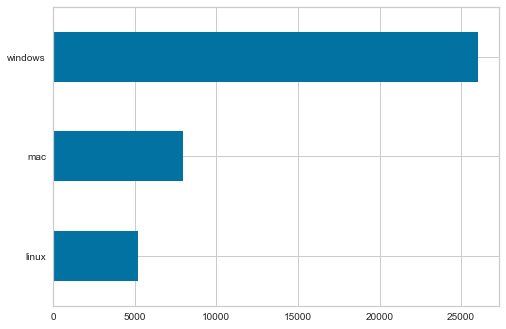

In [47]:
platforms = df[['linux', 'mac', 'windows']].sum()
platforms.plot(kind='barh')

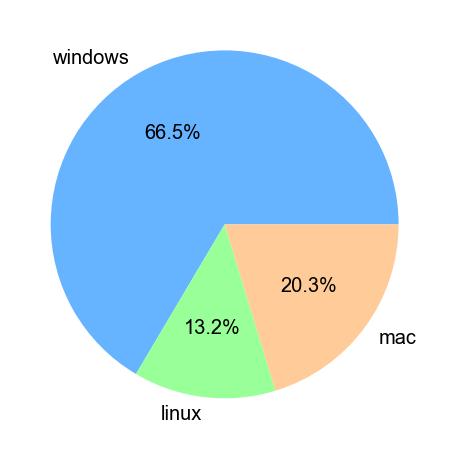

In [48]:
plt.figure(figsize=(8,8))
#df[['windows', 'linux', 'mac']].sum().plot(kind='pie', autopct='%1.1f%%', textprops=dict(color="w"))
platforms = df[['windows', 'linux', 'mac']].sum()
colors = ['#66b3ff','#99ff99','#ffcc99','#ff9999']
plt.pie(platforms, labels=platforms.index, colors=colors, autopct='%1.1f%%', textprops=dict(color="black", size=20))
plt.savefig('images/platforms-pie.pdf', bbox_inches='tight')

In [49]:
platforms.index
platforms.values

array([26035,  5182,  7941], dtype=int64)

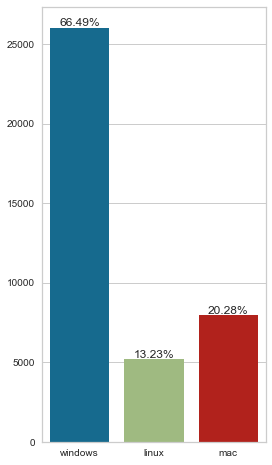

In [50]:
plt.figure(figsize=(4, 8))
ax = sns.barplot(x=platforms.index, y=platforms.values)

total = platforms.sum()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}%'.format(100*height/total),
            ha="center",va="bottom")
    
plt.savefig('images/platforms-bar.pdf', bbox_inches='tight')

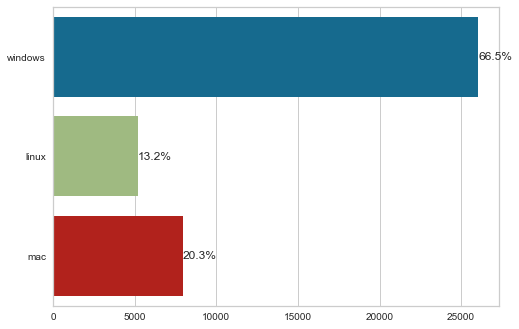

In [51]:
#plt.figure(figsize=(5, 10))
ax = sns.barplot(y=platforms.index, x=platforms.values)
total = platforms.sum()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()/2
    #ax.annotate(percentage, (x, y))
    ax.text(x, y, percentage, ha="left",va="center")
    
plt.savefig('images/platforms-barh.pdf', bbox_inches='tight')

In [52]:
platforms/platforms.sum()

windows    0.664871
linux      0.132336
mac        0.202794
dtype: float64

In [53]:
#barplot categories #barplot steamspy tags

In [68]:
dists = pdist(df[col_genres].transpose(), 'cosine')
dists_m = squareform(dists) ** 3
Z = linkage(squareform(dists_m), 'ward')

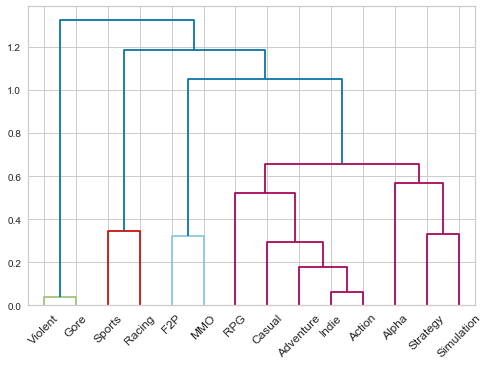

In [78]:
#plt.figure(figsize=(16, 16))
dendrogram(
    Z,
    leaf_rotation=45,  # rotates the x axis labels
#   leaf_font_size='large',  # font size for the x axis labels
    orientation='top',
    labels=sample.index
)
plt.savefig('images/dendrogram-genres.pdf', bbox_inches="tight")

In [ ]:
df[columns]

In [65]:
df[col_genres].transpose()

0      1      2      3      4      5      6      7      8      \
Indie           0      0      0      0      0      0      0      0      0   
Action          1      1      1      1      1      1      1      1      1   
Casual          0      0      0      0      0      0      0      0      0   
Adventure       0      0      0      0      0      0      0      0      0   
Strategy        0      0      0      0      0      0      0      0      0   
Simulation      0      0      0      0      0      0      0      0      0   
RPG             0      0      0      0      0      0      0      0      0   
Alpha           0      0      0      0      0      0      0      0      0   
F2P             0      0      0      0      0      0      0      0      0   
Sports          0      0      0      0      0      0      0      0      0   
Racing          0      0      0      0      0      0      0      0      0   
Violent         0      0      0      0      0      0      0      0      0   
MMO             0      0      0      0      0      0      0      0      0   
Gore            0      0      0      0      0      0      0      0      0   

            9      ...  27065  27066  27067  27068  27069  27070  27071  \
Indie           0  ...      1      1      1      1      1      1      1   
Action          1  ...      1      0      0      0      0      0      1   
Casual          0  ...      0      1      0      1      0      1      0   
Adventure       0  ...      0      1      1      1      0      1      1   
Strategy        0  ...      0      0      0      0      0      0      0   
Simulation      0  ...      1      0      0      1      0      0      0   
RPG             0  ...      0      1      0      0      0      0      0   
Alpha           0  ...      1      1      1      0      0      0      0   
F2P             0  ...      0      0      0      0      0      0      0   
Sports          0  ...      0      0      0      0      0      0      0   
Racing          0  ...      0      0      0      0      0      0      0   
Violent         0  ...      0      0      0      0      0      0      0   
MMO             0  ...      0      0      0      0      0      0      0   
Gore            0  ...      0      0      0      0      0      0      0   

            27072  27073  27074  
Indie           1      1      1  
Action          1      0      0  
Casual          1      1      1  
Adventure       0      1      1  
Strategy        0      0      0  
Simulation      0      0      0  
RPG             0      0      0  
Alpha           0      0      0  
F2P             0      0      0  
Sports          0      0      0  
Racing          0      0      0  
Violent         0      0      0  
MMO             0      0      0  
Gore            0      0      0  

[14 rows x 26040 columns]

In [64]:
df.transpose()

0                      1      \
appid                              10                     20   
name                   Counter-Strike  Team Fortress Classic   
release_date      2000-11-01 00:00:00    1999-04-01 00:00:00   
english                             1                      1   
developer                       Valve                  Valve   
publisher                       Valve                  Valve   
required_age                        0                      0   
achievements                        0                      0   
positive_ratings               124534                   3318   
negative_ratings                 3339                    633   
average_playtime                17612                    277   
median_playtime                   317                     62   
owners                       10000000                5000000   
price                            7.19                   3.99   
linux                               1                      1   
mac                                 1                      1   
windows                             1                      1   
Indie                               0                      0   
Action                              1                      1   
Casual                              0                      0   
Adventure                           0                      0   
Strategy                            0                      0   
Simulation                          0                      0   
RPG                                 0                      0   
Alpha                               0                      0   
F2P                                 0                      0   
Sports                              0                      0   
Racing                              0                      0   
Violent                             0                      0   
MMO                                 0                      0   
Gore                                0                      0   

                                2                    3      \
appid                              30                   40   
name                    Day of Defeat   Deathmatch Classic   
release_date      2003-05-01 00:00:00  2001-06-01 00:00:00   
english                             1                    1   
developer                       Valve                Valve   
publisher                       Valve                Valve   
required_age                        0                    0   
achievements                        0                    0   
positive_ratings                 3416                 1273   
negative_ratings                  398                  267   
average_playtime                  187                  258   
median_playtime                    34                  184   
owners                        5000000              5000000   
price                            3.99                 3.99   
linux                               1                    1   
mac                                 1                    1   
windows                             1                    1   
Indie                               0                    0   
Action                              1                    1   
Casual                              0                    0   
Adventure                           0                    0   
Strategy                            0                    0   
Simulation                          0                    0   
RPG                                 0                    0   
Alpha                               0                    0   
F2P                                 0                    0   
Sports                              0                    0   
Racing                              0                    0   
Violent                             0                    0   
MMO                                 0                    0   
Gore                                0                    0   